IMPORT MODULES

In [16]:
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

READ DATA

In [18]:
df = pd.read_csv('dataset.csv')

In [19]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [20]:
df.shape

(5000, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


DATA CLEANING AND PREPROCESSING

In [22]:
df['FastagID'].isnull().sum()
df = df[df['FastagID'].isnull() != True]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud


In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: 

DESCRIPTIVE STATISTICS

In [25]:
fraud_percentage = df['Fraud_indicator'].value_counts(normalize=True) * 100
fraud_percentage

Not Fraud    77.915075
Fraud        22.084925
Name: Fraud_indicator, dtype: float64

In [26]:
fraud_by_vehicle = df.groupby('Vehicle_Type')['Fraud_indicator'].value_counts(normalize=True).unstack()
fraud_by_vehicle

Fraud_indicator,Fraud,Not Fraud
Vehicle_Type,,
Bus,0.247207,0.752793
Car,0.170868,0.829132
Motorcycle,NaN,1.000000
SUV,0.257703,0.742297
Sedan,0.225490,0.774510
Truck,0.221289,0.778711
Van,0.253501,0.746499


In [27]:
daily_trends = df.resample('D', on='Timestamp')['Transaction_ID'].count()
daily_trends

Timestamp
2023-01-01    23
2023-01-02    19
2023-01-03    20
2023-01-04    14
2023-01-05    24
              ..
2023-12-27    13
2023-12-28    12
2023-12-29    14
2023-12-30    15
2023-12-31    17
Freq: D, Name: Transaction_ID, Length: 365, dtype: int64

HISTOGRAM - For Numerical Variables

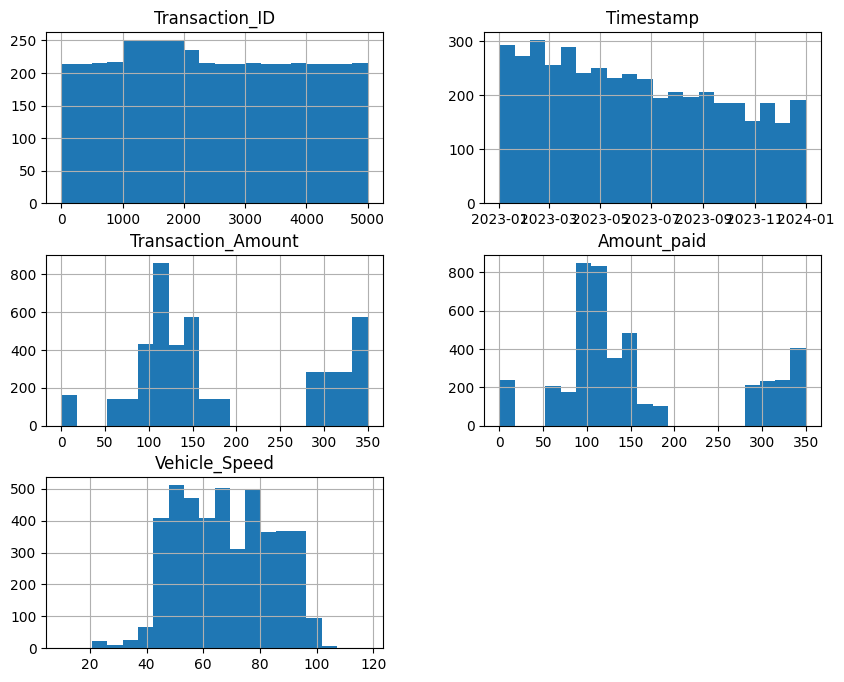

In [28]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

COUNTPLOT - Fraud_Indicator

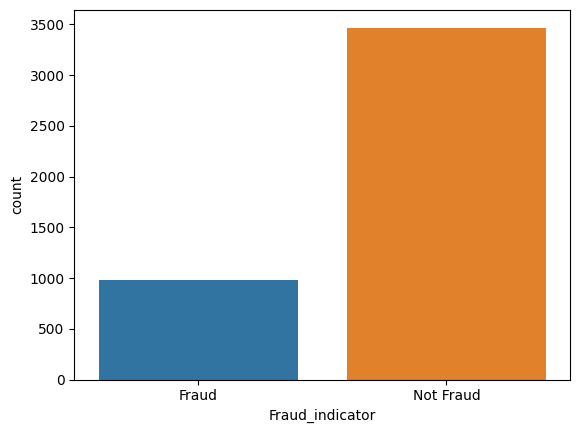

In [29]:
sns.countplot(x='Fraud_indicator', data=df)
plt.show()

DISTRIBUTION CURVE - Transaction_amount VS Amount_paid


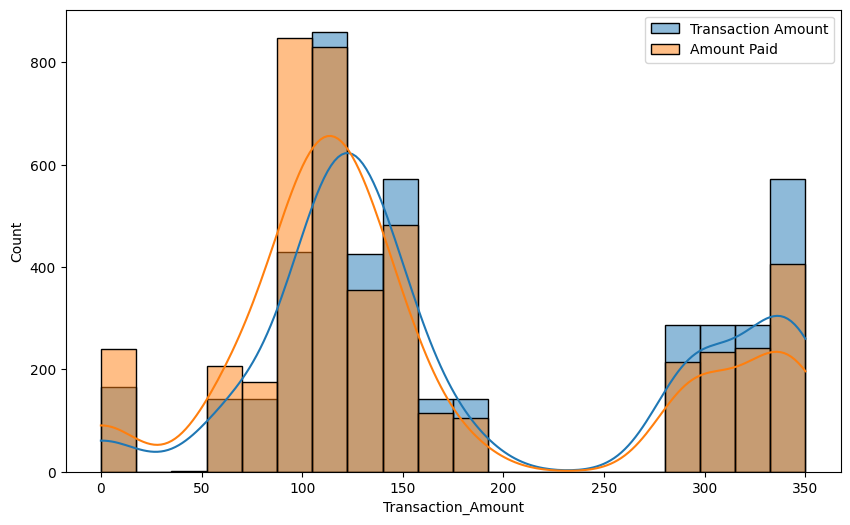

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'],bins = 20,kde = True,label = 'Transaction Amount')
sns.histplot(df['Amount_paid'],bins = 20,kde = True,label = 'Amount Paid')
plt.legend()
plt.show()

DAILY TRANSACTION TRENDS

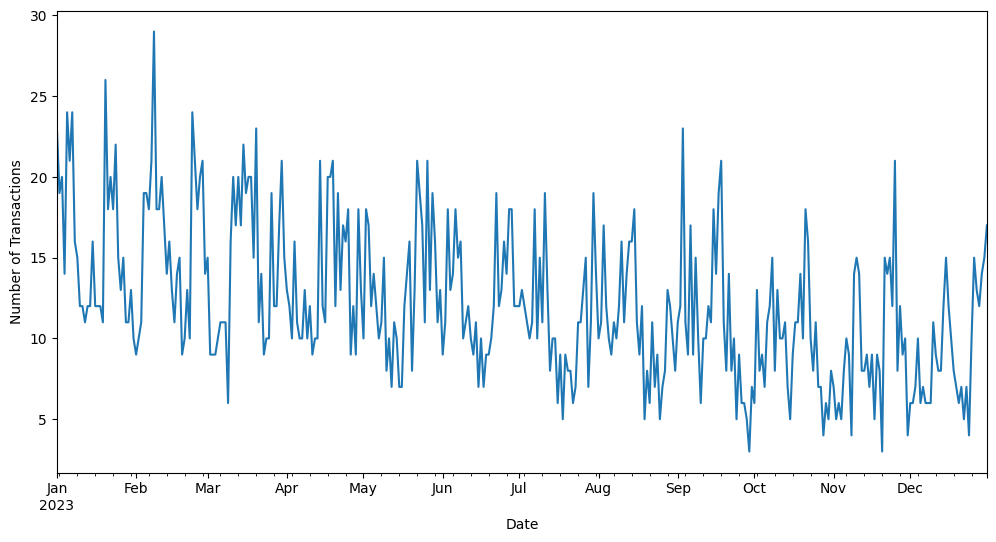

In [31]:
plt.figure(figsize=(12, 6))
daily_trends.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

DISTRIBUTION - Vehicle_type VS Transaction_amount

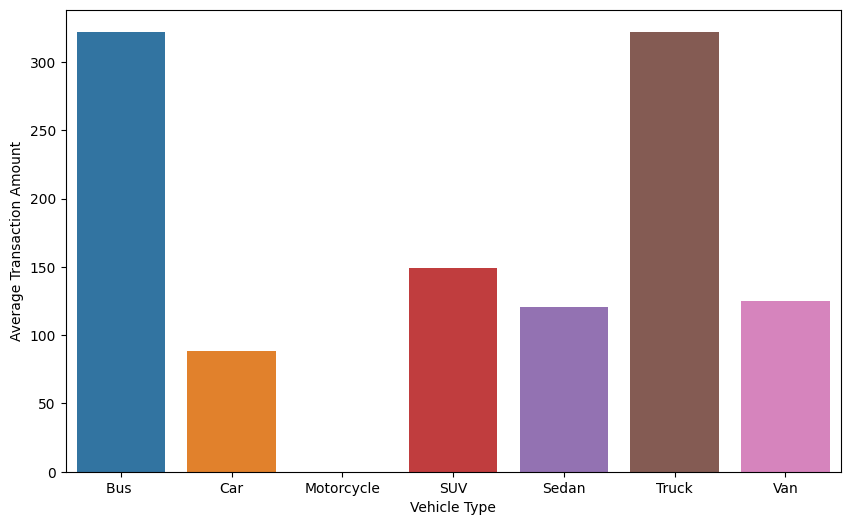

In [32]:
vehicle_dist = df.groupby('Vehicle_Type')['Transaction_Amount'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicle_dist.index, y=vehicle_dist.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Transaction Amount')
plt.show()

VEHICLE TYPE DISTRIBUTION

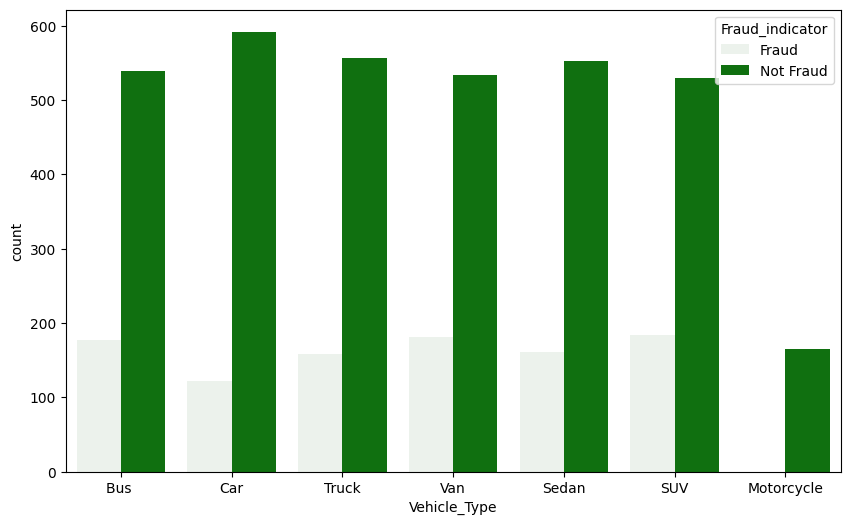

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df,color = 'green')
plt.show()

LANE TYPE DISTRIBUTION

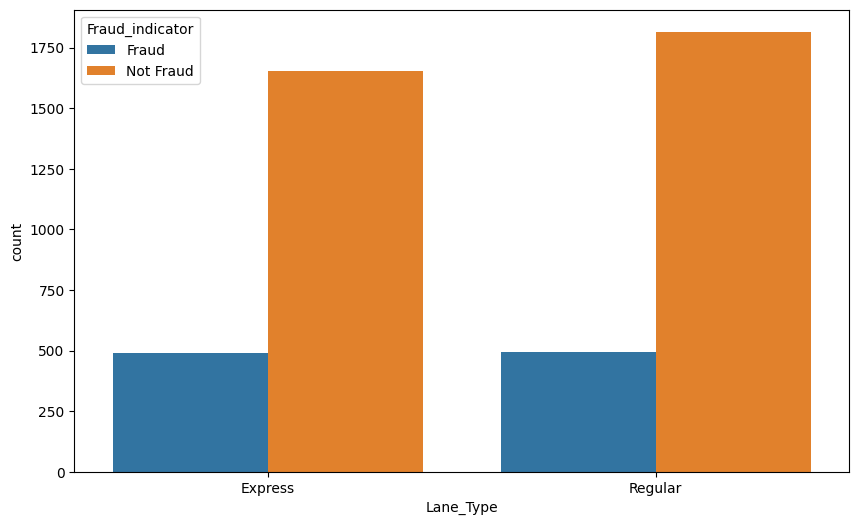

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
plt.show()

TIME SERIES ANALYSIS

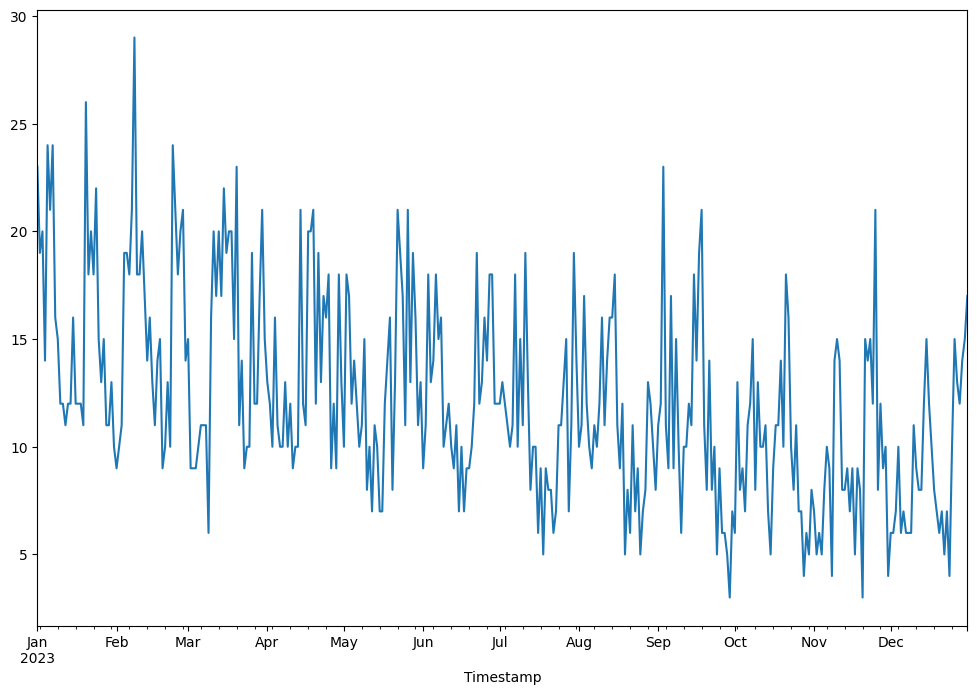

In [35]:
df.set_index('Timestamp', inplace=True)
df.resample('D')['Transaction_ID'].count().plot(figsize=(12, 8))
plt.show()

BOXPLOT - Transacation_amount VS Amount_paid

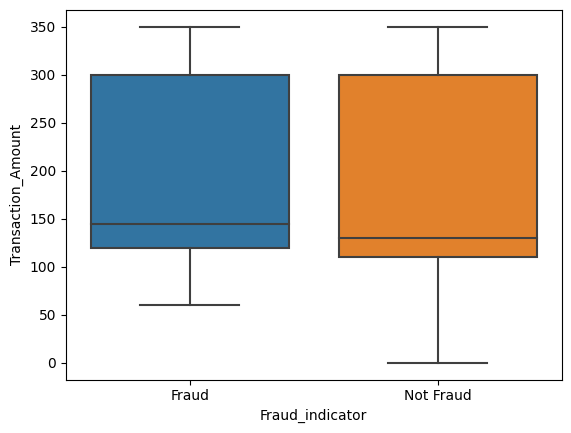

In [36]:
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.show()

PAIRWISE SCATTERPLOT - For Numerical Variables

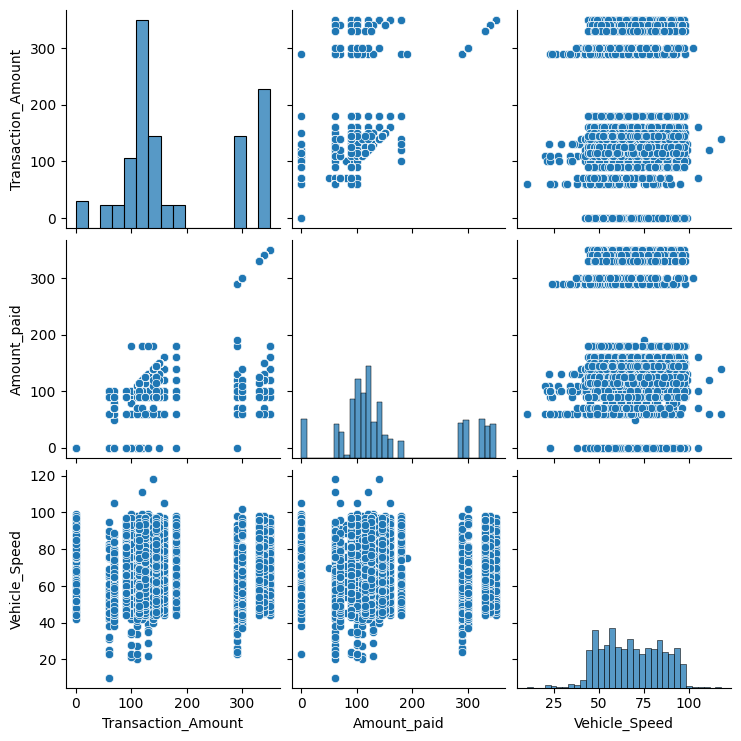

In [37]:
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

CORRELATION MATRIX HEATMAP - For Numerical Variables

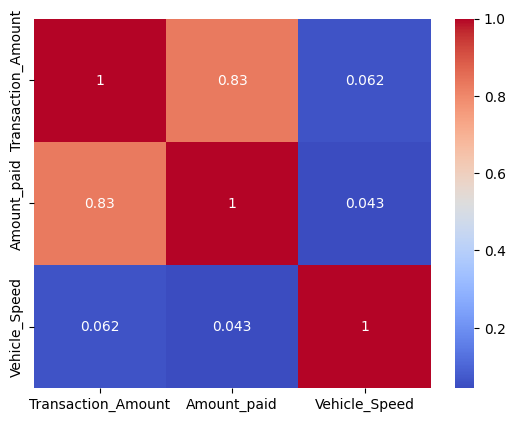

In [38]:
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

HISTOGRAM - Transacation_amount

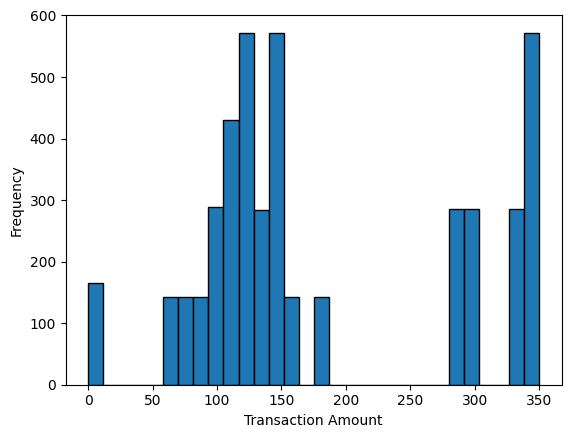

In [39]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

REGRESSION LINE - Transaction_amount VS Amount_paid

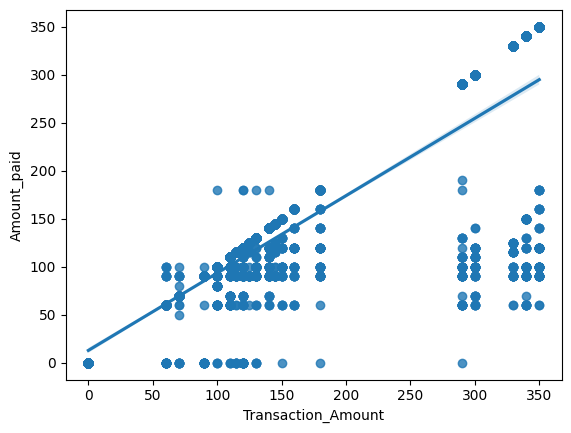

In [40]:
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()